## Highlighting data

~~~
cinci_pollution = pollution[pollution.city == 'Cincinnati']

cinci_colors = ['orangered' if day == 38 else 'steelblue' for day in cinci_pollution.day]

p = sns.regplot(x='NO2', y='SO2', data=cinci_pollution, fit_reg=False, scatter_kws={'facecolors': cinci_colors, 'alpha': 0.7})
~~~

## Kernel Distribution Estimator

- The kernel density estimator (KDE) plot is a kind of continuous histogram.

~~~
pollution_nov = pollution[pollution.month == 10]

sns.displot(pollution_nov[pollution_nov.city == 'Denver'].O3, hist=False, color='red')
sns.displot(pollution_nov[pollution_nov.city != 'Denver'].O3, hist=False)
~~~

## Beeswarm plot

~~~
pollution_nov = pollution[pollution.month == 10]

sns.swarmplot(y='city', x='O3', data=pollution_nov, size=4)
plt.xlabel('Ozone (O3)')
~~~

## Annotations

~~~
sns.scatterplot(x='NO2', y='SO2', data=houston_pollution)

plt.text(13, 33, 'Look at this outlier', fontdict={'ha': 'left', 'size': 'x-large'})
~~~

***

~~~
sns.scatterplot(x='NO2', y='SO2', data=houston_pollution)

plt.annotate('A buried point to look at', xy=(45.5, 11.8), xytext=(60, 22), arrowprops={'facecolor': 'grey', 'width': 3}, backgroundcolor='white')
~~~


## How color is used

- Differentiate classes of data
- Encodes continuous values
- Should be used **carefully**

## A remedy for the color-size illusion

~~~
sns.barplot(x=values, y=ids, edgecolor='black')
~~~

***
~~~
# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)
plt.show()
~~~

For more on `FacetGrid`, click [here](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html).

## Continuous collor palettes

~~~
blue_scale = sns.light_palette('steelblue')
sns.palplot(blue_scale)

red_scale = sns.dark_palette('orangered')
sns.palplot(red_scale)
~~~

## Be aware of color blindness

- Avoid transitions between green and red
- Palettes that use intensity are safer

<img src='./IMAGES/color-blindness.PNG'>

## Encoding neutral values

~~~
pal_light = sns.diverging_palette(250, 0)
pal_dark = sns.diverging_palette(250, 0, center='dark')
~~~

***

~~~
plt.style.use('seaborn-white')

light_palette = sns.light_palette('orangered')
sns.scatterplot(x='CO', y='NO2', hue='O3', data=lb_2012, palette=light_palette)
~~~

## Categorical palettes

~~~
colorbrewer_palettes = ['Set1', 'Set2', 'Set3', 'Accent', 'Paired', 'Pastel1', 'Pastel2', 'Dark']

for pal in colorbrewer_palettes:
	sns.palplot(pal=sns.color_palette(pal))
	plt.title(pal, loc='left')

~~~

- Ordinal palettes

~~~
colorbrewer_palettes = ['Reds', 'Blues', 'YlOrBr', 'PuBuGn', 'GnBu', 'Greys']

for i, pal in enumerate(colorbrewer_palettes):
	sns.palplot(pal=sns.color_palette(pal, n_colors=i+4))
~~~

***

~~~
# Make a tertials column using qcut()
pollution['NO2 Tertial'] = pd.qcut(pollution['NO2'], 3, labels=False)

# Plot colored by the computer tertials
sns.scatterplot(x='CO', y='SO2', hue='NO2 Tertial', palette='OrRd', data=pollution.query("city == 'Long Beach' & year == 2014"))
~~~

For more on `pandas.qcut()`, click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)


## Confidence interval

> "A 95% confidence interval represents a range of values that your estimate, such as an average, will fall in 95% of the time, if you would sample the population an infinite amount of times."

## Point estimate intervals

~~~
plt.hlines(xmin='lower', xmax='upper', y='y', data=data, linewidth=5, color='steelblue', alpha=0.5)

# Point estimate for reference
plt.plot('est', 'y', 'k|', data=data)
~~~

***

~~~
# Set start and ends according to intervals 
# Make intervals thicker
plt.hlines(y = 'year', xmin = 'lower', xmax = 'upper', 
           linewidth = 5, color = 'steelblue', alpha = 0.7,
           data = diffs_by_year)
# Point estimates
plt.plot('mean', 'year', 'k|', data = diffs_by_year)

# Add a 'null' reference line at 0 and color orangered
plt.axvline(x = 0, color = 'orangered', linestyle = '--')

# Set descriptive axis labels and title
plt.xlabel('95% CI')
plt.title('Avg SO2 differences between Cincinnati and Indianapolis')
plt.show()
~~~

## Confidence bands

~~~
plt.fill_between(x='day', y1='lower', y2='upper', data=cinci_so2)

# Add point-estimate reference line
plt.plot('day', 'mean', 'w-', alpha=0.5, data=data)
~~~

## Beyond 95%

~~~
# Interval size setup
sizes = ['99%', '95%', '90%']
Z_scores = [2.58, 1.96, 1.67]
colors = ['#fee0b6', '#f1a340', '#b35806']

for size, z, color in zip(sizes, Z_scores, colors):
	plt.hlines(y=data.y, xmin = data['est'] - z*data['std_err'], xmax = data['est'] + z*data[std_err], color=color, linewidth=7, label=size)

plt.plot('est', 'y', 'ko', data=data, label='Point Estimate')

plt.legend()
~~~

## Coloring your intervals

<img src='./IMAGES/coloring-intervals.PNG'>

## Coloring bands

~~~
widths = ['99%', '90%']
z_scores = [2.58, 1.67]
colors = ['#99d8c9', '#41ae76']

for percent, Z, color in zip(widths, z_scores, colors):
	plt.fill_between(x=data.day, y1=data['mean'] - Z*data['std_err'], y2=data['mean'] + Z*data['std_err'], color=color, alpha=0.5, label=percent)
~~~

<img src='./IMAGES/coloring-bands.PNG'>

## Gray intervals

~~~
# Decrase interval thickness as interval widens
sizes =      [    15,  10,  5]
int_widths = ['90% CI', '95%', '99%']
z_scores =   [    1.67,  1.96,  2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y = rocket_model.pollutant, 
               xmin = rocket_model['est'] - Z*rocket_model['std_err'],
               xmax = rocket_model['est'] + Z*rocket_model['std_err'],
               label = percent, 
               # Resize lines and color them gray
               linewidth = size, 
               color = 'gray') 
    
# Add point estimate
plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()
~~~

<img src='./IMAGES/gray-intervals.PNG'>

## Visualizing the bootstrap

~~~
denver_may = pollution.query("city == 'Denver' & month = 8")

# Perform bootstrapped mean on a vector
def bootstrap(data, n_boots):
	return [np.mean(np.random.choice(data, len(data))) for _ in range(n_boots)]

# Generate 1000 bootstrap samples
boot_means = bootstrap(denver_may.NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Shaded background of interval
plt.axvspan(lower, upper, color='grey', alpha=0.2)

# Plot histogram of samples
sns.distplot(boot_means, bins=100, kde=False)
~~~

<img src='./IMAGES/bootstrap-viz.PNG'>

## Bootstrapping and regression

~~~
denver_may_boot = pd.concat([denver_may.sample(n=len(denver_may), replace=True).assign(sample=i) for i in range(100)])

sns.lmplot('CO', 'O3', hue='sample', line_kws={'color': 'coral', 'alpha': 0.2}, ci=None, legend=False)
~~~

<img src='./IMAGES/bootstrap-viz-reg.PNG'>

***

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
plt.style.use('ggplot')

In [6]:
pollution = pd.read_csv('./DATASETS/pollution_wide.csv')

In [7]:
pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


In [8]:
# Show just median
pollution.describe(percentiles=[0.5], include='all')

,city,year,month,day,CO,NO2,O3,SO2
count,8888,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Houston,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.621737,6.657516,187.187894,0.492867,23.689168,0.035904,3.824927
std,NaN,1.084081,3.328182,101.739060,0.403896,16.760212,0.013221,6.582867
min,NaN,2012.000000,1.000000,1.000000,-0.150000,0.000000,0.000000,-1.300000
50%,NaN,2014.000000,7.000000,192.000000,0.350000,22.000000,0.036000,1.650000
max,NaN,2015.000000,12.000000,366.000000,5.170000,136.400000,0.108000,145.000000


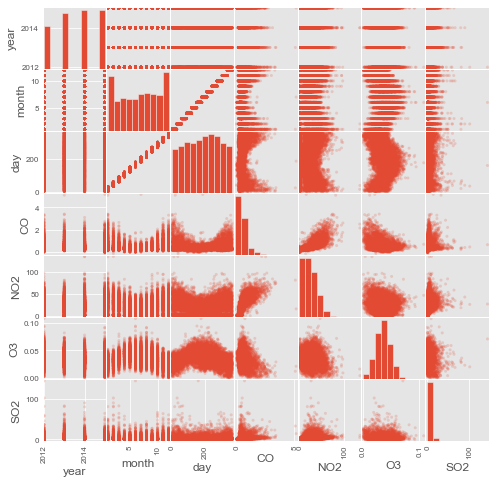

In [30]:
pd.plotting.scatter_matrix(pollution, alpha=0.2, figsize=(8,8))

plt.show()

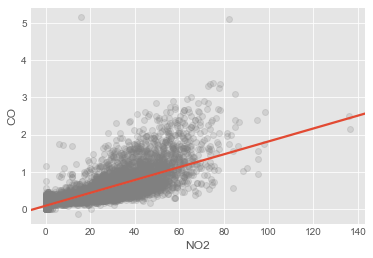

In [37]:
sns.regplot('NO2', 'CO', ci=False, data=pollution, scatter_kws={'alpha': 0.2, 'color': 'grey'})

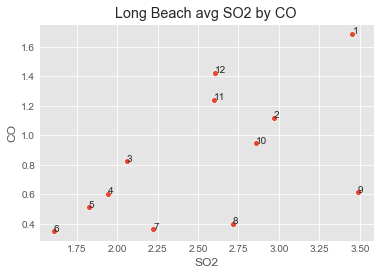

In [57]:
long_beach_avgs = pollution.loc[(pollution.city=='Long Beach'), ['month', 'SO2', 'CO']].groupby('month').mean().reset_index()

g = sns.scatterplot('SO2', 'CO', data=long_beach_avgs)

for _, row in long_beach_avgs.iterrows():
    month, SO2, CO = row

    g.annotate(int(month), (SO2, CO))

plt.title('Long Beach avg SO2 by CO')

plt.show()

***

In [28]:
markets = pd.read_csv('./DATASETS/markets_cleaned.csv')

In [29]:
markets.head()

,FMID,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Plants,Poultry,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine
0,1018261,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.140337,44.411036,3.0,1,1,...,0,1,1,0,1,0,1,1,0,0
1,1018318,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,-81.733939,41.374801,4.0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1009364,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,-82.818700,34.804200,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1010691,10th Steet Community Farmers Market,Lamar,Barton,Missouri,-94.274619,37.495628,8.0,1,0,...,1,1,1,0,1,0,0,1,0,0
4,1002454,112st Madison Avenue,New York,New York,New York,-73.949300,40.793900,5.0,1,0,...,0,0,1,0,1,0,0,1,0,0


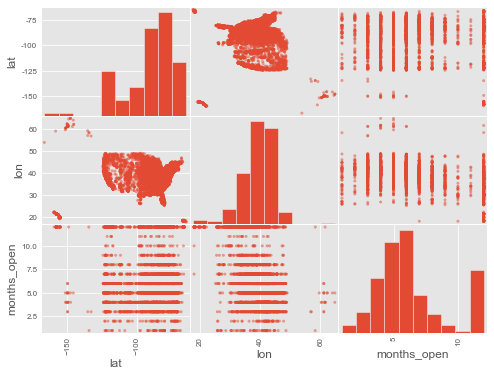

In [36]:
# Select just the numeric columns (exluding individual goods)
numeric_columns = ['lat', 'lon', 'months_open']

# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(markets[numeric_columns], 
                             # Make figure large to show details
                             figsize = (8,6), 
                           # Lower point opacity to show overlap
                           alpha = 0.5)

plt.show()

In [55]:
long_beach_avgs

,month,SO2,CO
0,1,3.454472,1.688415
1,2,2.967647,1.117647
2,3,2.060887,0.823387
3,4,1.940160,0.604787
4,5,1.825403,0.511290
5,6,1.609649,0.350000
6,7,2.223250,0.363250
7,8,2.716500,0.398000
8,9,3.489792,0.612917
9,10,2.860177,0.946460
